In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import STL
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import numpy as np
from matplotlib.patches import Patch



%matplotlib inline
sns.set(style="whitegrid")

# Read data
df = pd.read_csv("cleaned_dataset.csv")

In [2]:
df = df.sort_values("sales_datetime")

df['sales_datetime'] = pd.to_datetime(df['sales_datetime'])  
df = df.set_index("sales_datetime") #every row represents time

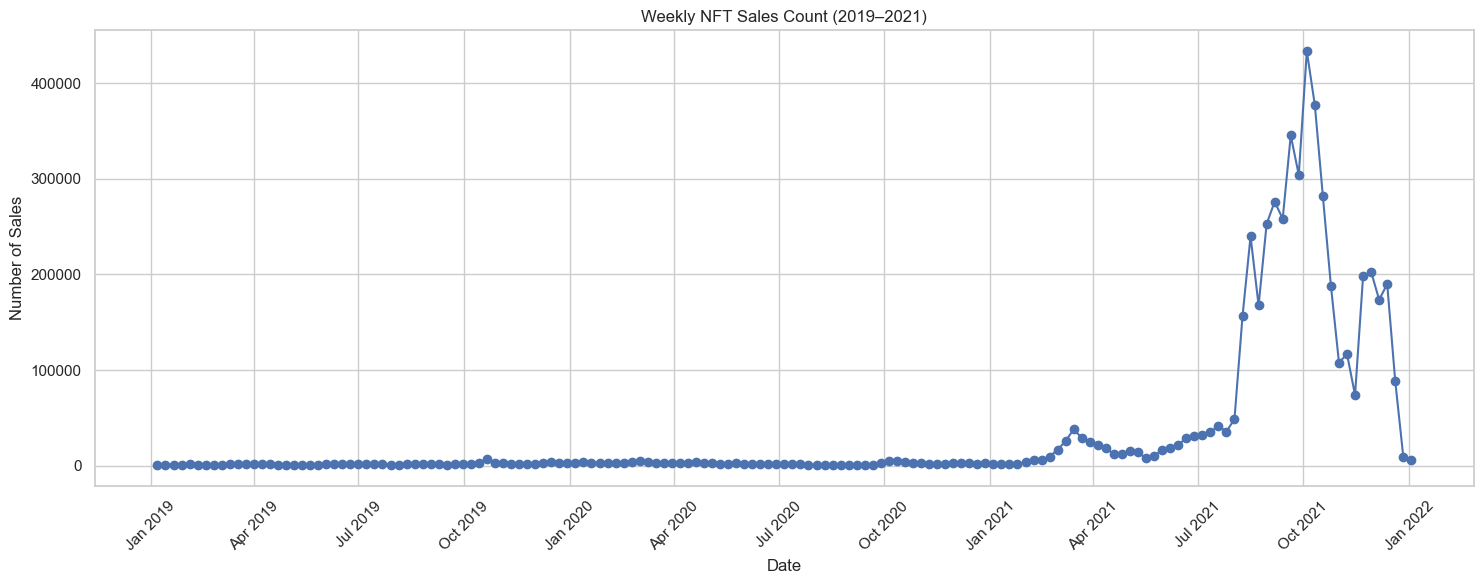

In [3]:
#WEEKLY NFT SALES COUNT: INITIAL ANALYSIS
# start from monday
#The resample() method is used to resample time series data into a specified time interval.
weekly_sales_count = df.resample('W-MON').size() #group by beginning of the week

# Graph
plt.figure(figsize=(15, 6))
plt.plot(weekly_sales_count.index, weekly_sales_count.values, marker='o')

# X axis bin = 3
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) #format month + year
#gca = get current axis

plt.title("Weekly NFT Sales Count (2019–2021)")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.grid(True)
plt.xticks(rotation=45)  # increase readability of labels
plt.tight_layout()
plt.show()

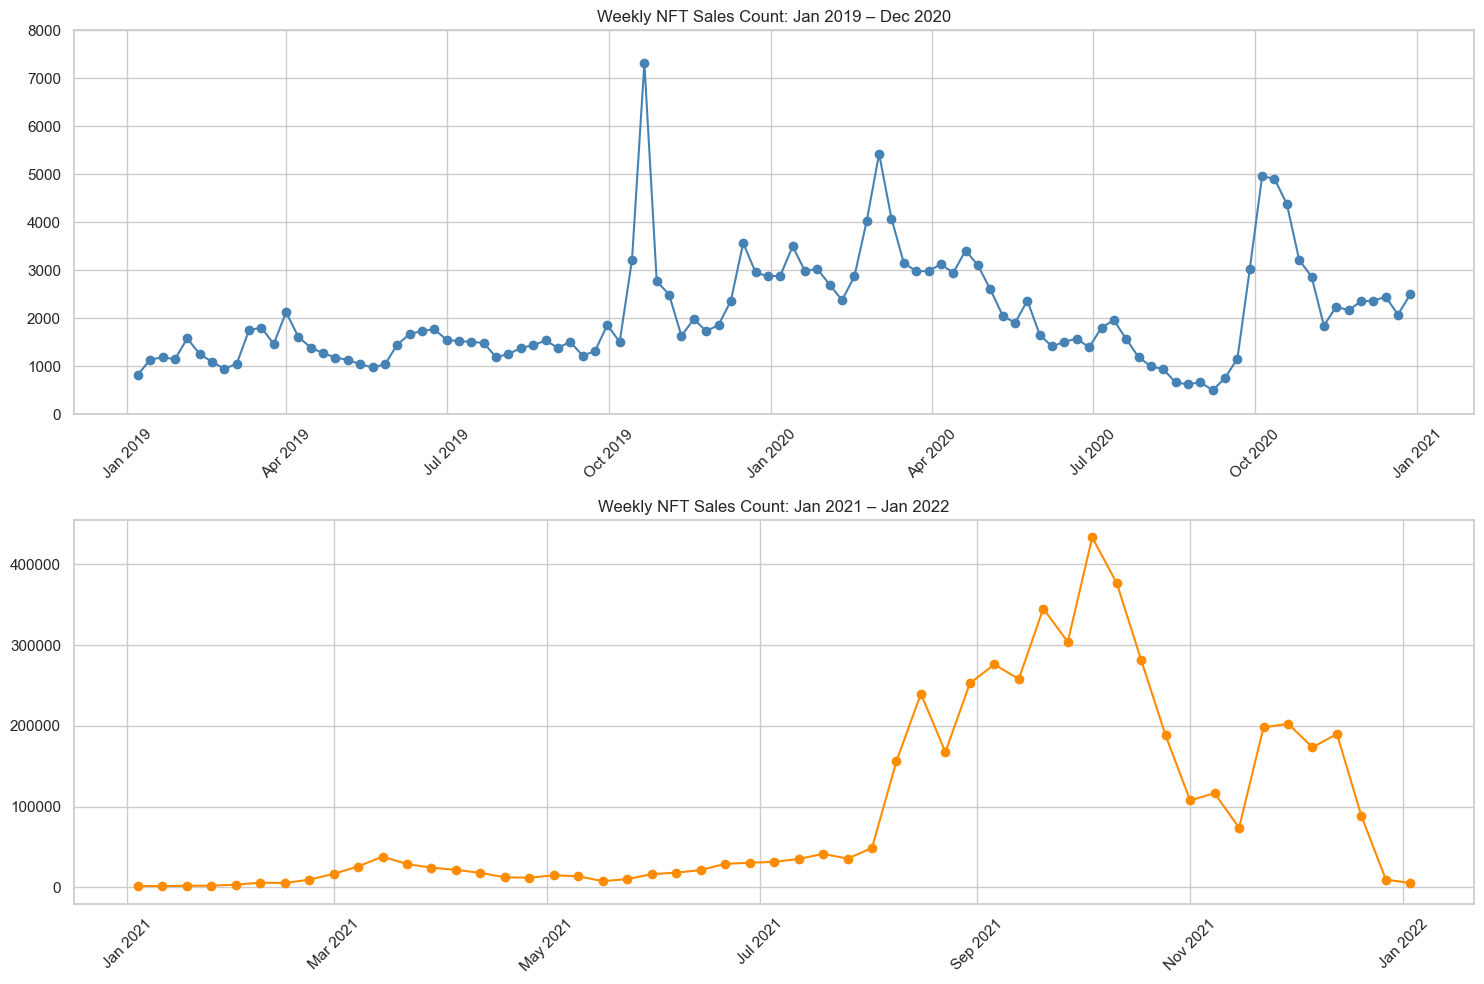

In [4]:
#WEEKLY NFT SALES COUNT ON DIFFERENT TIME PERIODS

period1 = weekly_sales_count['2019-01':'2020-12']
period2 = weekly_sales_count['2021-01':'2022-01']


# graph
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharey=False) # dont share y axis
# 2 row, 1 column

# Period 1 (Jan 2019 – Dec 2020)
axes[0].plot(period1.index, period1.values, marker='o', color='steelblue')
axes[0].set_title("Weekly NFT Sales Count: Jan 2019 – Dec 2020")
axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 8000)  # limit y axis only for this graph

# Period 2 (Jan 2021 – Jan 2022)
axes[1].plot(period2.index, period2.values, marker='o', color='darkorange')
axes[1].set_title("Weekly NFT Sales Count: Jan 2021 – Jan 2022")
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=2))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\zehra\AppData\Local\Temp\ipykernel_15980\3303121214.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average_price_monthly = df['usd_price'].resample('M').mean()


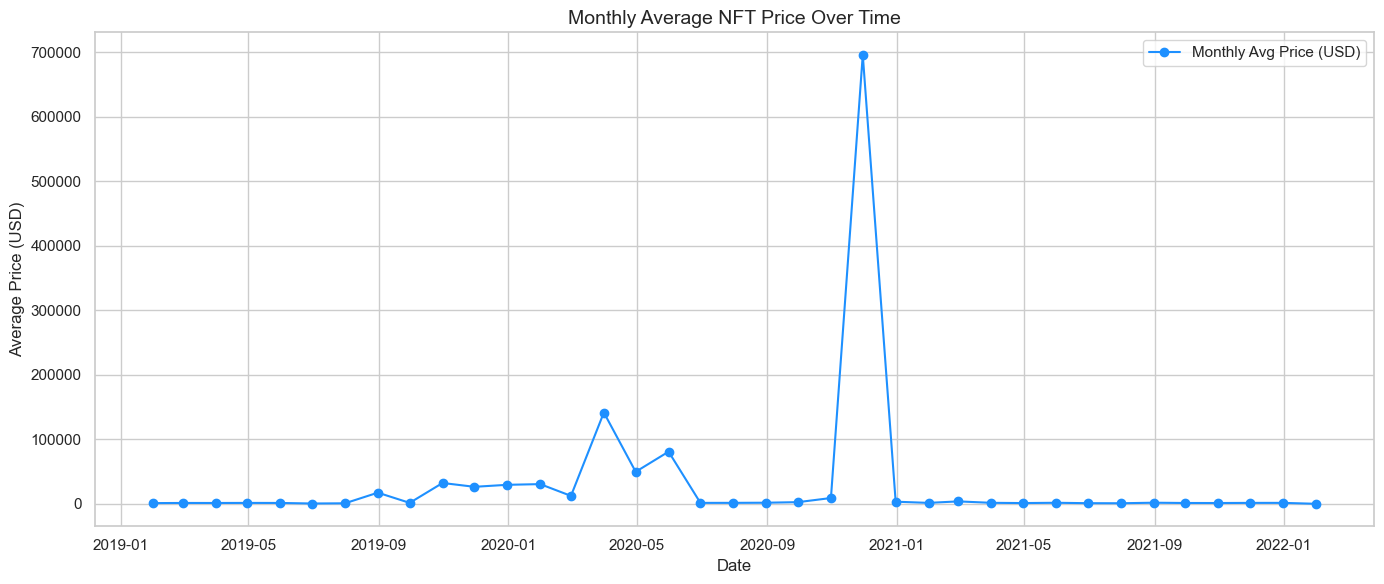

In [5]:
# Monthly average price
average_price_monthly = df['usd_price'].resample('M').mean()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(average_price_monthly.index, average_price_monthly.values, marker='o', color='dodgerblue', label='Monthly Avg Price (USD)')

ax.set_title("Monthly Average NFT Price Over Time", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Average Price (USD)", fontsize=12)

formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)

ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


C:\Users\zehra\AppData\Local\Temp\ipykernel_15980\2579134122.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_total_usd = df_filtered['usd_sales'].resample('M').sum()
C:\Users\zehra\AppData\Local\Temp\ipykernel_15980\2579134122.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_count = df_filtered['usd_sales'].resample('M').count() #used in several parts


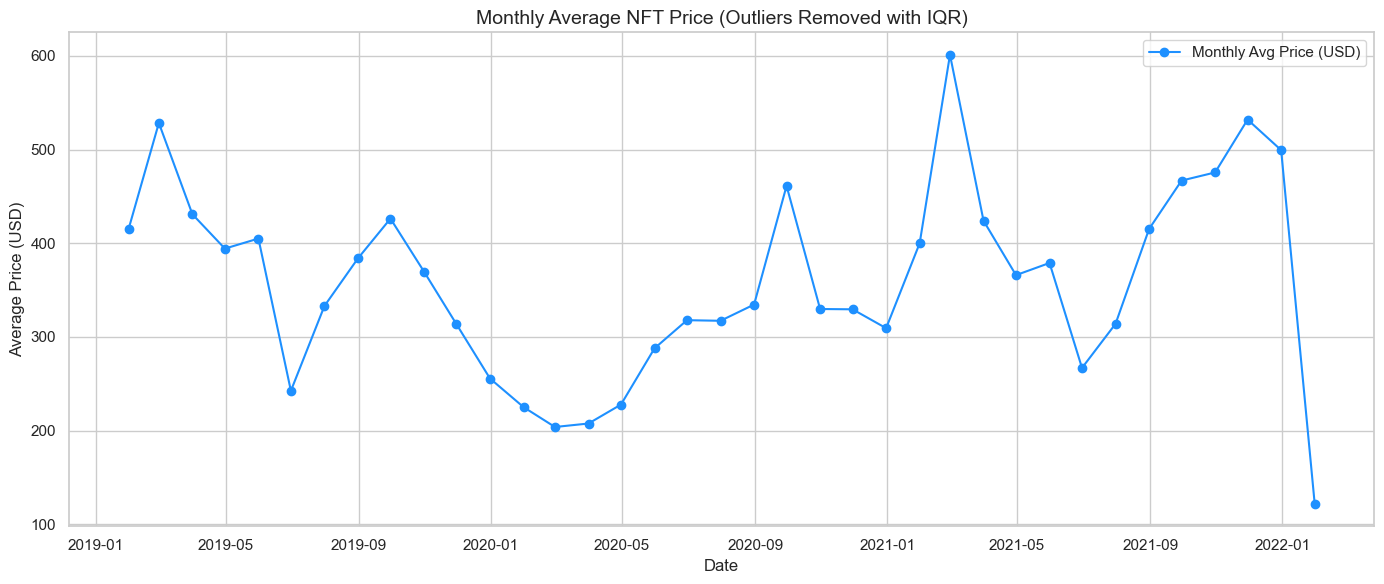

In [6]:
# create new column
df['usd_sales'] = df['total_price'] * df['payment_token.usd_price']

# IQR 
Q1 = df['usd_sales'].quantile(0.25)
Q3 = df['usd_sales'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers
df_filtered = df[(df['usd_sales'] >= lower_bound) & (df['usd_sales'] <= upper_bound)]

#calculate average monthly price
monthly_total_usd = df_filtered['usd_sales'].resample('M').sum()
monthly_sales_count = df_filtered['usd_sales'].resample('M').count() #used in several parts
average_price_monthly = monthly_total_usd / monthly_sales_count


fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(average_price_monthly.index, average_price_monthly.values, marker='o', color='dodgerblue', label='Monthly Avg Price (USD)')

ax.set_title("Monthly Average NFT Price (Outliers Removed with IQR)", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Average Price (USD)", fontsize=12)

formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)

ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


C:\Users\zehra\AppData\Local\Temp\ipykernel_15980\255969991.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['usd_price'].resample('M').mean()


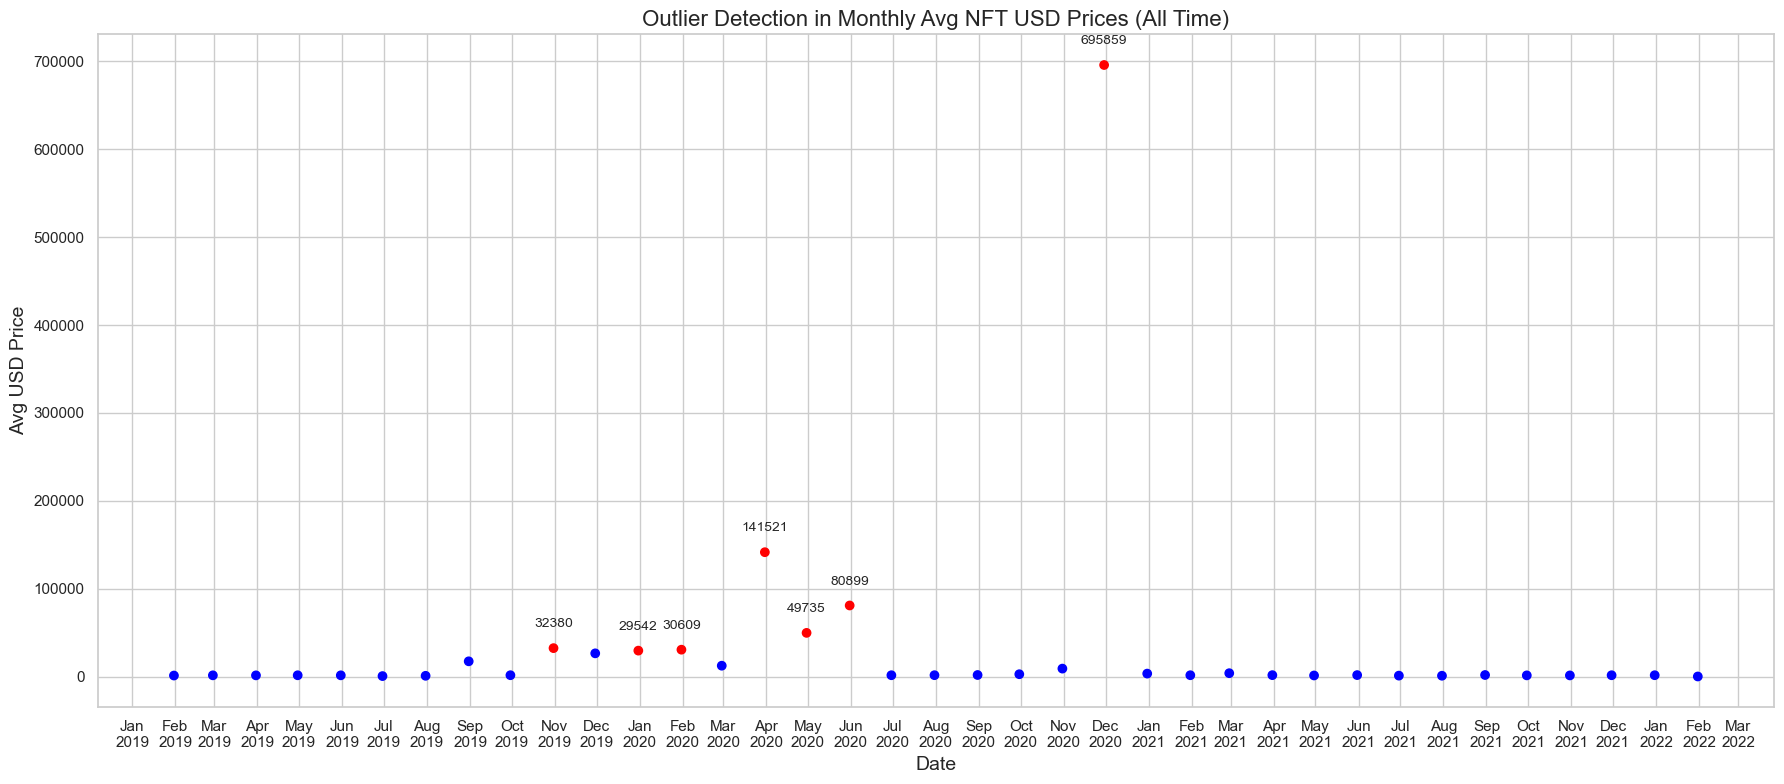

In [7]:
# avg price with outliers
monthly_avg = df['usd_price'].resample('M').mean()


# IQR to detect outliers
Q1 = monthly_avg.quantile(0.25)
Q3 = monthly_avg.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
is_outlier = (monthly_avg < lower_bound) | (monthly_avg > upper_bound)


fig, ax = plt.subplots(figsize=(18, 8)) 

ax.scatter(monthly_avg.index, monthly_avg.values,
           c=is_outlier.map({True: 'red', False: 'blue'})) # c = color

# select only outlier months 
# items index (time) - value (price) pair for outlier
for i, (idx, val) in enumerate(monthly_avg[is_outlier].items()):
    ax.annotate(f"{val:.0f}", (idx, val),
                textcoords="offset points", #offset labels up
                xytext=(0, 15),  # Shift the labels up y=15
                ha='center', #label at horizontal center
                fontsize=10)

# X-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # show every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))  # up:month down:year 

ax.set_title("Outlier Detection in Monthly Avg NFT USD Prices (All Time)", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Avg USD Price", fontsize=14)
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)
plt.tight_layout()
plt.show()


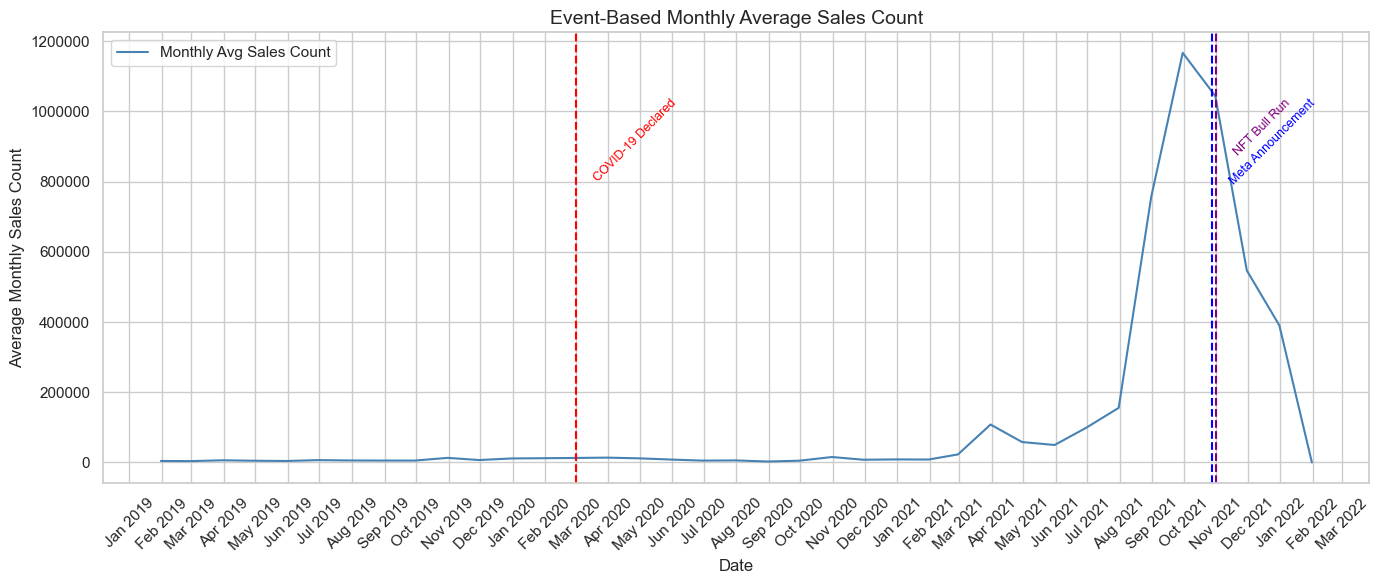

In [8]:
events = {
    "COVID-19 Declared": ("2020-03-01", "red"),
    "Meta Announcement": ("2021-10-28", "blue"),
    "NFT Bull Run": ("2021-11-01", "purple"),
}


# monthly sales count based on Month End (ME)
monthly_sales_count = df_filtered['usd_price'].resample('ME').count()

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales_count.index, monthly_sales_count.values,
         label="Monthly Avg Sales Count", color='steelblue')

# add vertical lines and labels for events
for label, (date_str, color) in events.items():
    date = pd.to_datetime(date_str)
    plt.axvline(date, color=color, linestyle='--', linewidth=1.5)
    plt.text(date + pd.Timedelta(days=15), # Place the x coordinate 15 days after the event date
             plt.ylim()[1] * 0.85, # y coordinate limit take %85
             label,
             rotation=45,
             verticalalignment='top',
             fontsize=9,
             color=color)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

formatter.set_scientific(False)
formatter.set_powerlimits((0, 0))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Event-Based Monthly Average Sales Count", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Monthly Sales Count", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


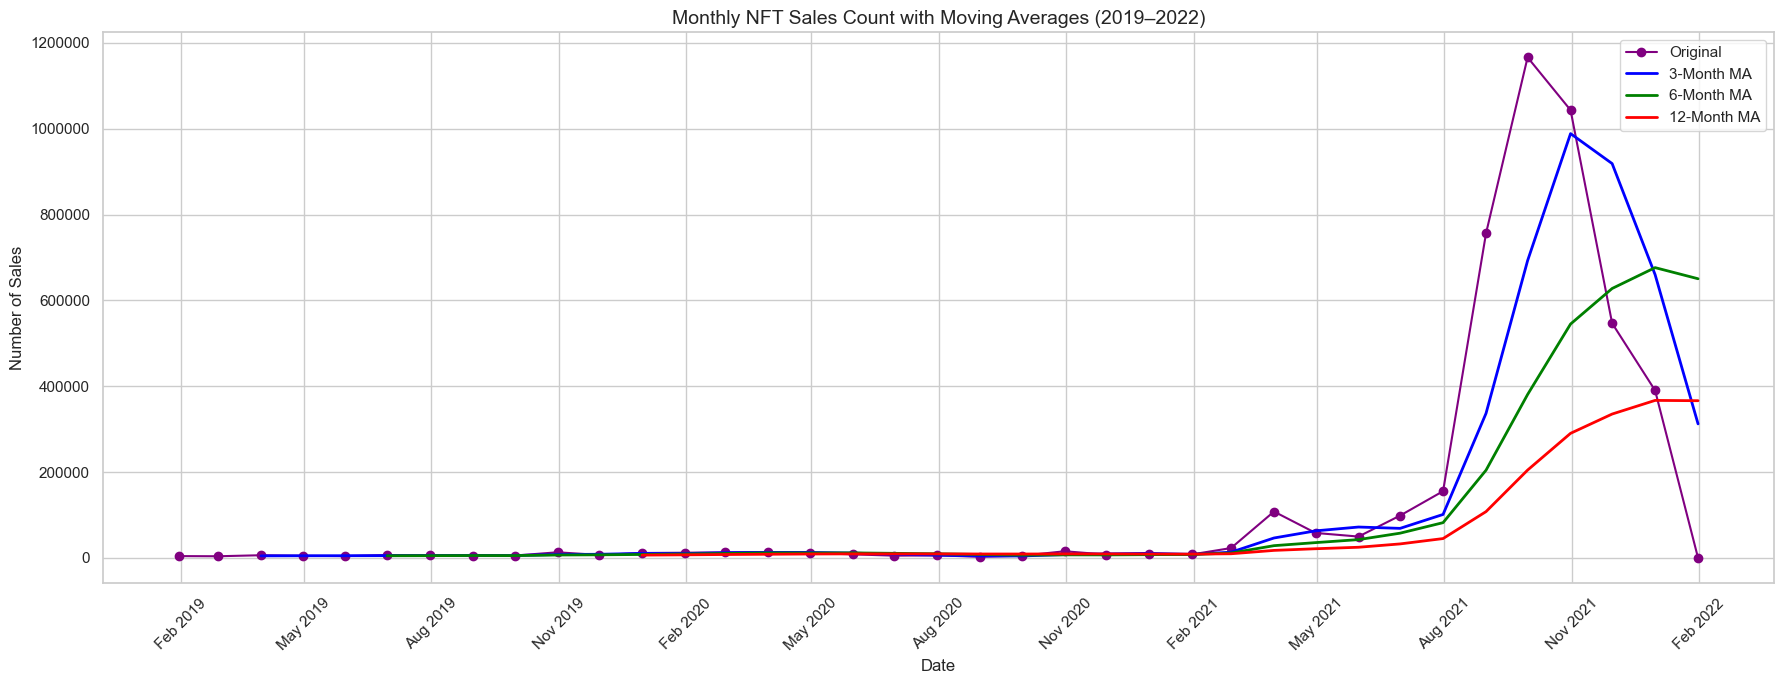

In [9]:
#MOVING AVERAGES BASED ON 3-6-12 MONTHS ON SAME GRAPH

# calculate moving averages
ma3 = monthly_sales_count.rolling(window=3).mean()
ma6 = monthly_sales_count.rolling(window=6).mean()
ma12 = monthly_sales_count.rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(18, 7))

# Original data
ax.plot(monthly_sales_count.index, monthly_sales_count.values, label='Original', color='purple', marker='o')

# moving averages
ax.plot(ma3.index, ma3.values, label='3-Month MA', color='blue', linewidth=2)
ax.plot(ma6.index, ma6.values, label='6-Month MA', color='green', linewidth=2)
ax.plot(ma12.index, ma12.values, label='12-Month MA', color='red', linewidth=2)

# Titles and labels
ax.set_title("Monthly NFT Sales Count with Moving Averages (2019–2022)", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Sales", fontsize=12)

# X axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', rotation=45)

# Y axis format scientific represent (off)
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 0))  
ax.yaxis.set_major_formatter(formatter)

ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


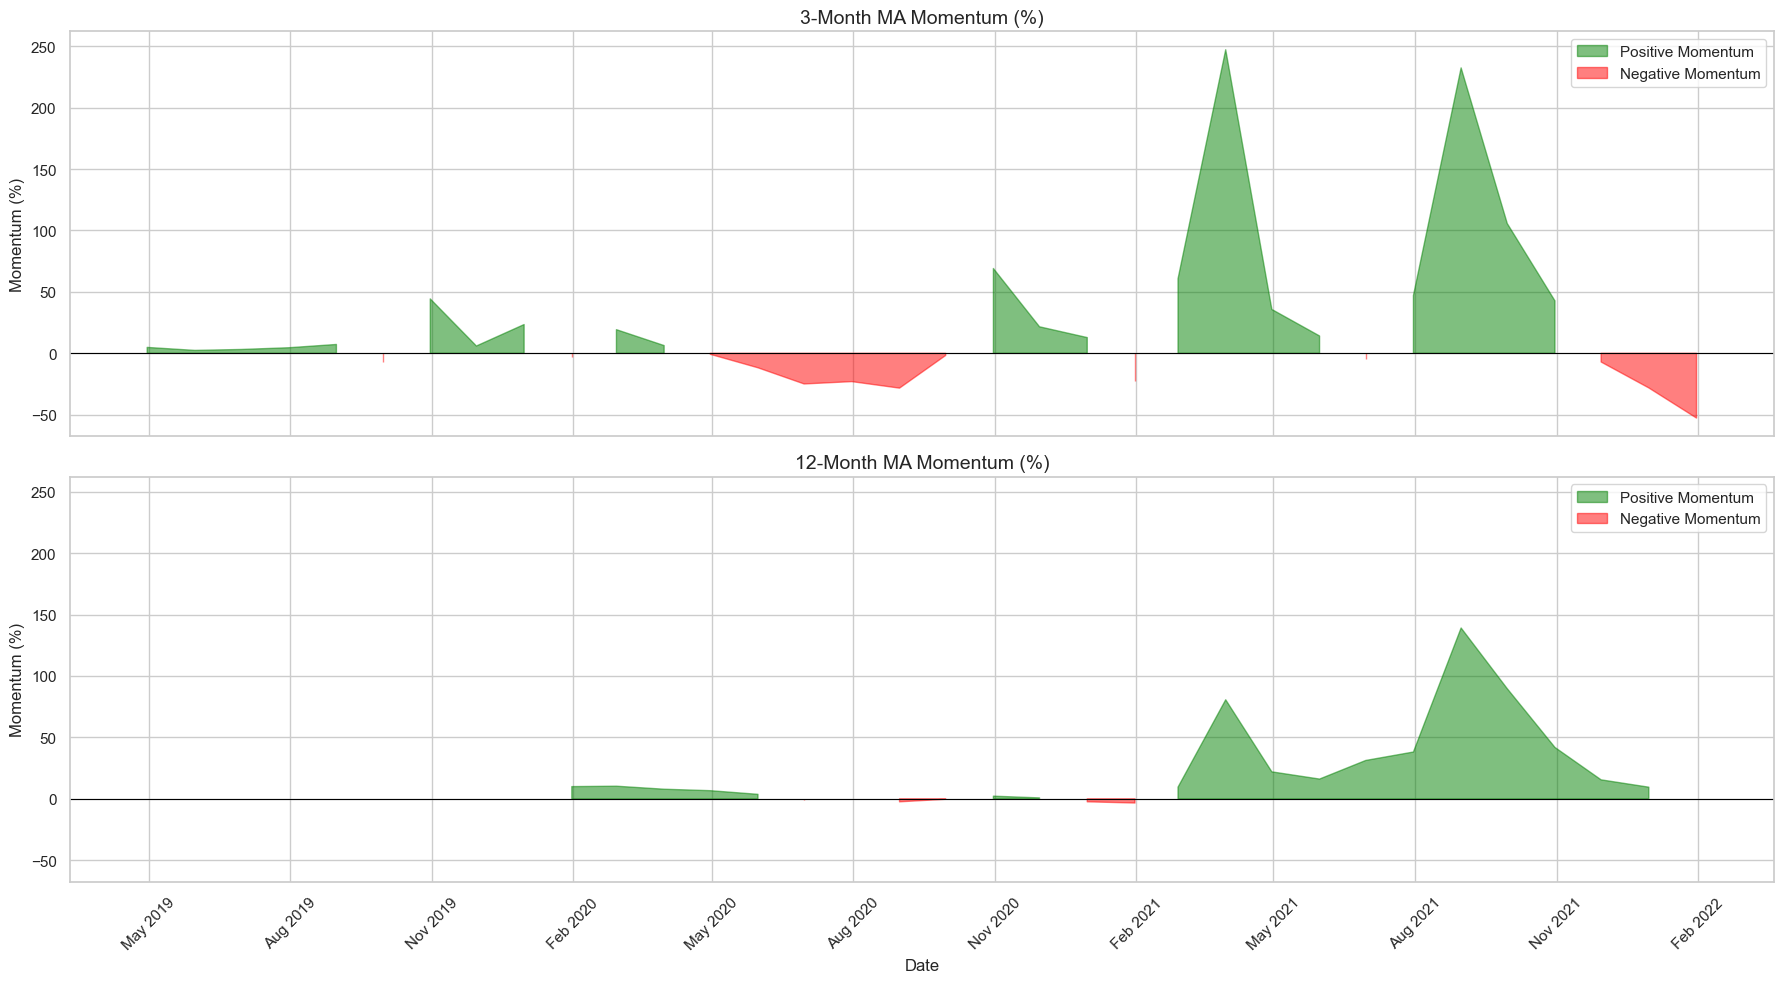

In [10]:
start_date = '2019-01-01'
end_date = '2022-12-31'
filtered_sales = monthly_sales_count.loc[start_date:end_date]

# calculate moving averages
ma3 = filtered_sales.rolling(window=3).mean()
ma12 = filtered_sales.rolling(window=12).mean()

# momentum gives percentage value
# rate of change over time
def momentum(ma, n):
    return (ma - ma.shift(n)) / ma.shift(n) * 100 #ma.shift(n) take value from n months ago


momentum_3 = momentum(ma3, 1)  # shift 1 month
momentum_12 = momentum(ma12, 1)

fig, axes = plt.subplots(2, 1, figsize=(18, 10), sharex=True)


# 3 months momentum
axes[0].fill_between(momentum_3.index, momentum_3, 0, where=(momentum_3 >= 0), color='green', alpha=0.5, label='Positive Momentum')
axes[0].fill_between(momentum_3.index, momentum_3, 0, where=(momentum_3 < 0), color='red', alpha=0.5, label='Negative Momentum')
axes[0].axhline(0, color='black', linewidth=0.8)
axes[0].set_title('3-Month MA Momentum (%)', fontsize=14)
axes[0].set_ylabel('Momentum (%)')
axes[0].legend()
axes[0].grid(True)

# 12 months momentum
axes[1].fill_between(momentum_12.index, momentum_12, 0, where=(momentum_12 >= 0), color='green', alpha=0.5, label='Positive Momentum')
axes[1].fill_between(momentum_12.index, momentum_12, 0, where=(momentum_12 < 0), color='red', alpha=0.5, label='Negative Momentum')
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].set_title('12-Month MA Momentum (%)', fontsize=14)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Momentum (%)')
axes[1].legend()
axes[1].grid(True)

# Match the Y-axis limits of the 12-month chart to those of the 3-month chart.
ylim_values = axes[0].get_ylim()
axes[1].set_ylim(ylim_values)


for ax in axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

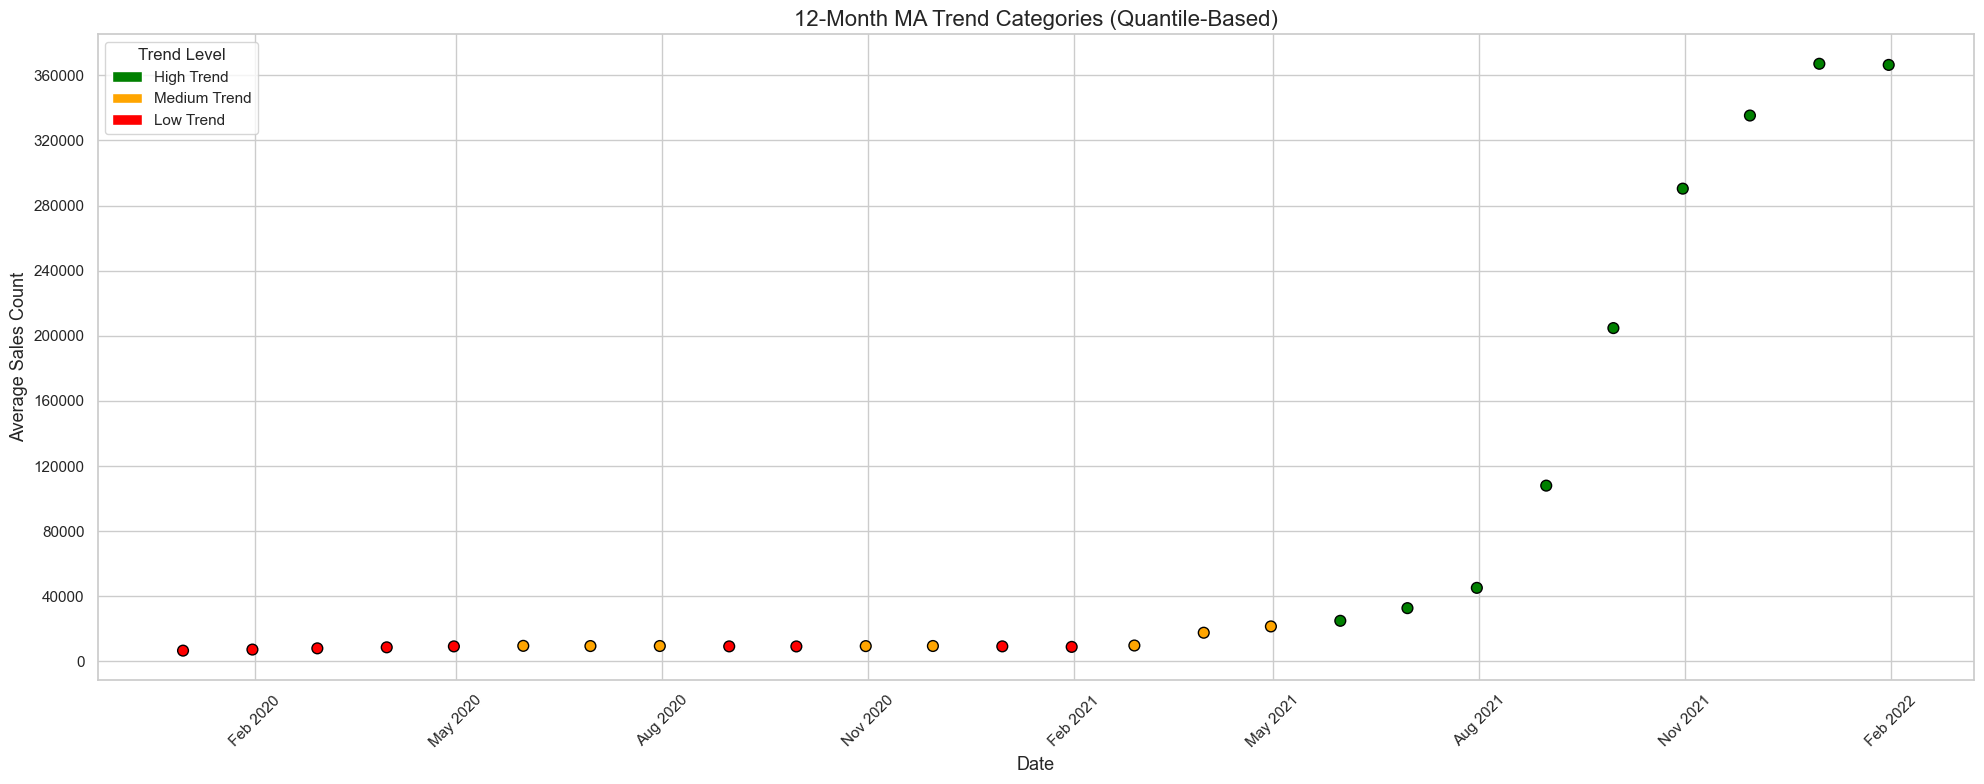

Trend Thresholds (Quantiles):
 - Low Trend (≤ 9,250)
 - Medium Trend (9,250 – 23,187)
 - High Trend (> 23,187)

Category Distribution:
usd_price
Low Trend       9
High Trend      9
Medium Trend    8
Name: count, dtype: int64


In [11]:
# Remove NaN values from MA series
ma12_clean = ma12.dropna()
#The overall trend is considered instead of temporary spikes or drops.
#A more reliable analysis is obtained by filtering out noise.

# Calculate quantile thresholds for trend classification
low_threshold = ma12_clean.quantile(0.33)
high_threshold = ma12_clean.quantile(0.66)

# Categorization function
def categorize_trend_quantile(ma_value):
    if ma_value > high_threshold:
        return 'High Trend'
    elif ma_value > low_threshold:
        return 'Medium Trend'
    else:
        return 'Low Trend'

# Apply trend categorization
trend_categories = ma12_clean.apply(categorize_trend_quantile)

# Color mapping for trends
color_map = {
    'High Trend': 'green',
    'Medium Trend': 'orange',
    'Low Trend': 'red'
}
colors = trend_categories.map(color_map)


fig, ax = plt.subplots(figsize=(20, 8))  # Larger figure size

# Scatter plot with colored trend categories
ax.scatter(ma12_clean.index, ma12_clean.values, c=colors, s=60, edgecolor='black')

ax.set_title("12-Month MA Trend Categories (Quantile-Based)", fontsize=16)
ax.set_ylabel("Average Sales Count", fontsize=13)
ax.set_xlabel("Date", fontsize=13)

# Format x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', rotation=45)

# Format y-axis with limited number of ticks
ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # Avoid too many ticks on y axis
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)

# Legend for trend colors
legend_elements = [
    Patch(facecolor='green', label='High Trend'),
    Patch(facecolor='orange', label='Medium Trend'),
    Patch(facecolor='red', label='Low Trend')
]
ax.legend(handles=legend_elements, title="Trend Level")

ax.grid(True)
plt.tight_layout()
plt.show()

#Category Info 
print("Trend Thresholds (Quantiles):")
print(f" - Low Trend (≤ {low_threshold:,.0f})")
print(f" - Medium Trend ({low_threshold:,.0f} – {high_threshold:,.0f})")
print(f" - High Trend (> {high_threshold:,.0f})\n")

print("Category Distribution:")
print(trend_categories.value_counts())
